TODO:

- Create convenient client dataloader like:
    ```py
    source, _ = tff.simulation.datasets.emnist.load_data()
    def client_data(n):
        return source.create_tf_dataset_for_client(source.client_ids[n]).map(
            lambda e: (tf.reshape(e['pixels'], [-1]), e['label'])
        ).repeat(10).batch(20)

    # Pick a subset of client devices to participate in training.
    train_data = [client_data(n) for n in range(3)]
    ```
- Get Leaf Model
- Run Free Loader Attacks 

In [1]:
import flwr as fl
from dataset.dataset import create_federated_dataloaders
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
from sklearn import preprocessing

In [2]:
trainloaders, valloaders, testloaders = create_federated_dataloaders(
    sampling_type = 'niid',
    dataset_fraction = 0.1,
    batch_size = 32,
    train_fraction = 0.8,
    validation_fraction = 0.1,
    test_fraction = 0.1,
    random_seed = 42,
)

INFO flwr 2023-07-29 19:34:36,189 | dataset.py:231 | NIST data downloading started
INFO flwr 2023-07-29 19:34:36,191 | zip_downloader.py:49 | Files from https://s3.amazonaws.com/nist-srd/SD19/by_class.zip are already downloaded and extracted from the zip file into data/raw. Skipping downloading and extracting.
INFO flwr 2023-07-29 19:34:36,192 | zip_downloader.py:49 | Files from https://s3.amazonaws.com/nist-srd/SD19/by_write.zip are already downloaded and extracted from the zip file into data/raw. Skipping downloading and extracting.
INFO flwr 2023-07-29 19:34:36,192 | dataset.py:240 | NIST data downloading done
INFO flwr 2023-07-29 19:34:36,193 | dataset.py:243 | Preprocessing of the NIST data started
WARNING flwr 2023-07-29 19:34:36,196 | nist_preprocessor.py:64 | The preprocessed information already exists in data/processed_FeMNIST/processed_images_to_labels.csv. It's assumed that the preprocessed images exist too.Specify 'overwrite' as True to preprocess the images and recreate th

In [3]:
import pathlib
import pandas as pd
df_info_path = pathlib.Path("data/processed_FeMNIST/processed_images_to_labels.csv")
df_info = pd.read_csv(df_info_path, index_col=0)

In [9]:
from dataset.nist_sampler import NistSampler
sampler = NistSampler(df_info)

In [10]:
sampled_data_info = sampler.sample(
        'niid', 1, random_seed=42
)

In [11]:
label_encoder = preprocessing.LabelEncoder()
labels = label_encoder.fit_transform(sampled_data_info["character"])
labels

array([36, 49, 28, ..., 52, 38, 48])

In [12]:
sampled_data_info['labels'] = labels

In [13]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [14]:
sampled_data_info.writer_id.value_counts()

writer_id
f0261_06    583
f0289_10    464
f0027_29    446
f0292_16    442
f0155_13    442
           ... 
f2027_41     33
f1965_23     30
f1725_33     24
f0825_23     21
f1727_36     18
Name: count, Length: 3597, dtype: int64

In [15]:
sampled_data_info.writer_id.unique()

array(['f1454_12', 'f1290_49', 'f1100_46', ..., 'f0788_34', 'f0507_19',
       'f3677_29'], dtype=object)

In [16]:
random_author_id = np.random.choice(sampled_data_info.writer_id.unique(), size=1)[0]
random_author_id

'f3222_24'

In [17]:
author_info_df = sampled_data_info[sampled_data_info.writer_id == random_author_id]

In [18]:
author_info_df.character.unique()

array(['J', 'D', 'C', 'M', 'H', 'T', 'K', 'G', 'N', 'F', 'X', 'O', 'B',
       'U', 'Z', 'Q', 'V', 'S', 'A', 'R', 'Y', 'I', 'P', 'L', 'E', '8',
       '5', '9', '3', '1', '4', '6', '2', '0', '7', 'd', 't', 'p', 'u',
       'h', 'w', 'j', 'z', 'o', 'g', 'c', 'b', 'f', 'l', 'r', 'm', 'y',
       's', 'n', 'a', 'x', 'k'], dtype=object)

In [19]:
author_info_df.character.nunique()

57

In [20]:
author_info_df.path

id
382944    data/processed_FeMNIST/images/character_J_nth_...
382945    data/processed_FeMNIST/images/character_D_nth_...
382946    data/processed_FeMNIST/images/character_C_nth_...
382947    data/processed_FeMNIST/images/character_M_nth_...
382948    data/processed_FeMNIST/images/character_H_nth_...
                                ...                        
383108    data/processed_FeMNIST/images/character_s_nth_...
383109    data/processed_FeMNIST/images/character_n_nth_...
383110    data/processed_FeMNIST/images/character_a_nth_...
383111    data/processed_FeMNIST/images/character_x_nth_...
383112    data/processed_FeMNIST/images/character_k_nth_...
Name: path, Length: 169, dtype: object

In [21]:
# transforms.ToTensor()

In [30]:
author_info_df.path.sample(9)


id
383049    data/processed_FeMNIST/images/character_6_nth_...
383106    data/processed_FeMNIST/images/character_y_nth_...
383036    data/processed_FeMNIST/images/character_5_nth_...
383057    data/processed_FeMNIST/images/character_3_nth_...
383024    data/processed_FeMNIST/images/character_1_nth_...
383089    data/processed_FeMNIST/images/character_d_nth_...
383095    data/processed_FeMNIST/images/character_j_nth_...
382983    data/processed_FeMNIST/images/character_2_nth_...
383025    data/processed_FeMNIST/images/character_1_nth_...
Name: path, dtype: object

In [36]:
author_info_df.columns

Index(['writer_id', 'path', 'character', 'labels'], dtype='object')

,character,path
id,,
383049,6,data/processed_FeMNIST/images/character_6_nth_...
382945,D,data/processed_FeMNIST/images/character_D_nth_...
382986,5,data/processed_FeMNIST/images/character_5_nth_...
383101,b,data/processed_FeMNIST/images/character_b_nth_...
383041,8,data/processed_FeMNIST/images/character_8_nth_...
383073,9,data/processed_FeMNIST/images/character_9_nth_...
383067,3,data/processed_FeMNIST/images/character_3_nth_...
383076,4,data/processed_FeMNIST/images/character_4_nth_...
383074,7,data/processed_FeMNIST/images/character_7_nth_...


In [40]:
sample_df = author_info_df[['character','path']].sample(9)
images =[ Image.open(path) for path in sample_df.path]
ylabels = [l for l in sample_df.character]

# print(path)

In [41]:
ylabels

['U', '5', '3', '8', '0', 'H', '2', '7', '3']

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

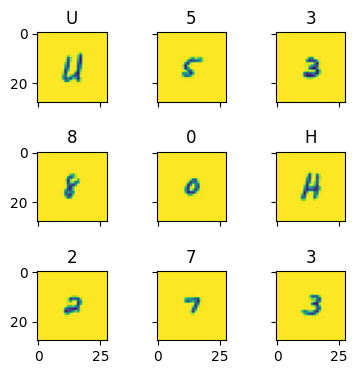

In [46]:
fig = plt.figure(figsize=(4, 4.))
grid = ImageGrid(fig, 111, nrows_ncols=(3,3), axes_pad=0.5)

for ax, im,l in zip(grid,images,ylabels):
    ax.imshow(im)
    # ax.set_xlabel(l)
    ax.set_title(l)